In [ ]:
wine_qt  = '1HPwGGOTCyk8zdW2pt870VkKIQb-QyMmr'
download_url1 = f'https://drive.google.com/uc?id={wine_qt}&export=download'

import pandas as pd
wine_data = pd.read_csv(download_url1, encoding='latin-1')

display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
display(wine_data.shape)

display(wine_data.info())

display(wine_data.describe())

wine_data.drop_duplicates(inplace=True)   # no duplicates

display(wine_data.shape)

display(wine_data.isnull().sum())

(1143, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


(1143, 13)

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


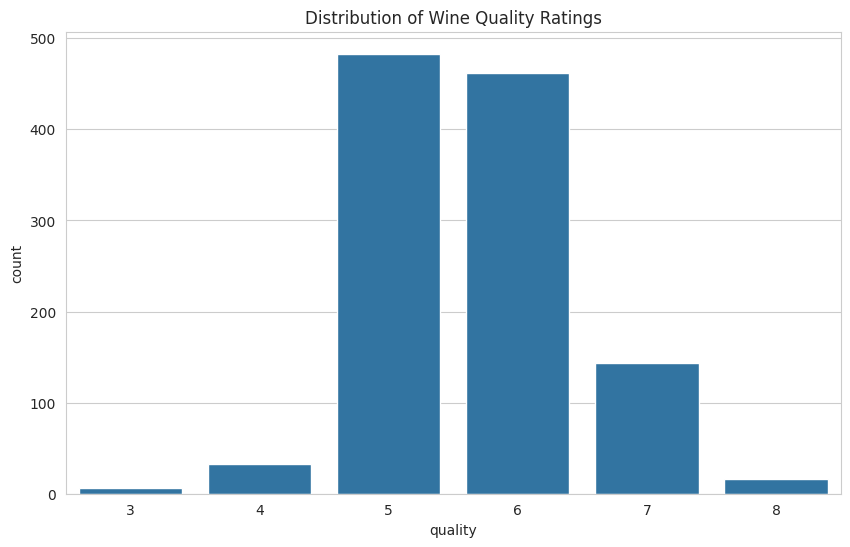

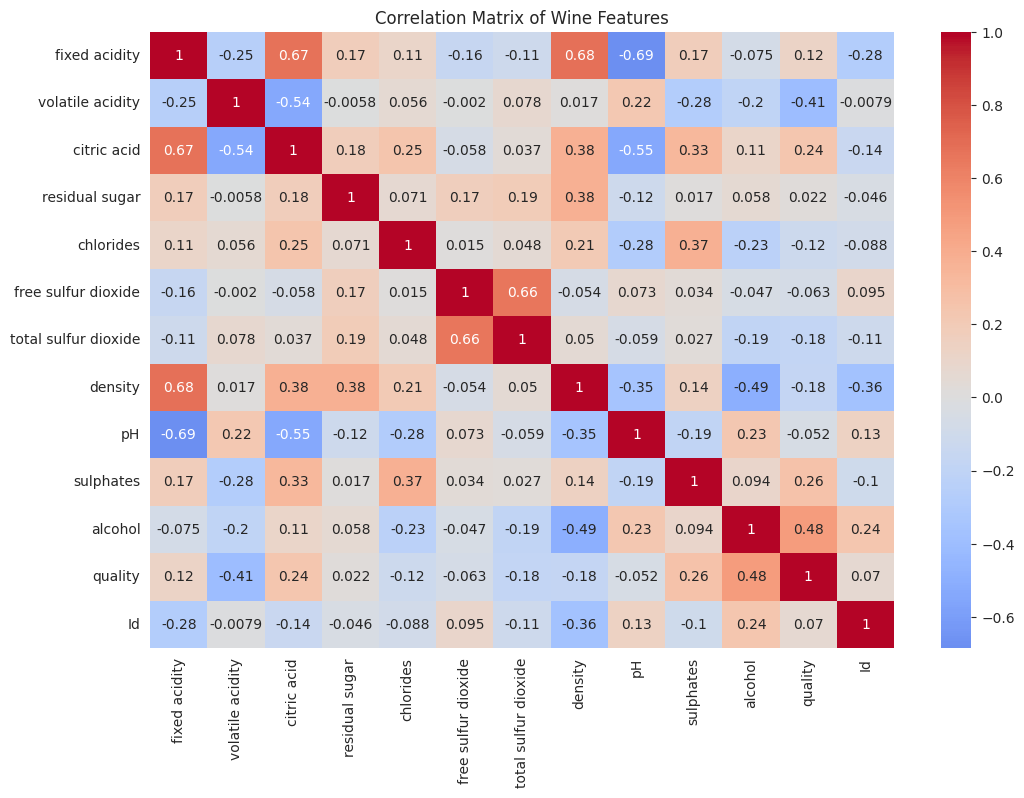

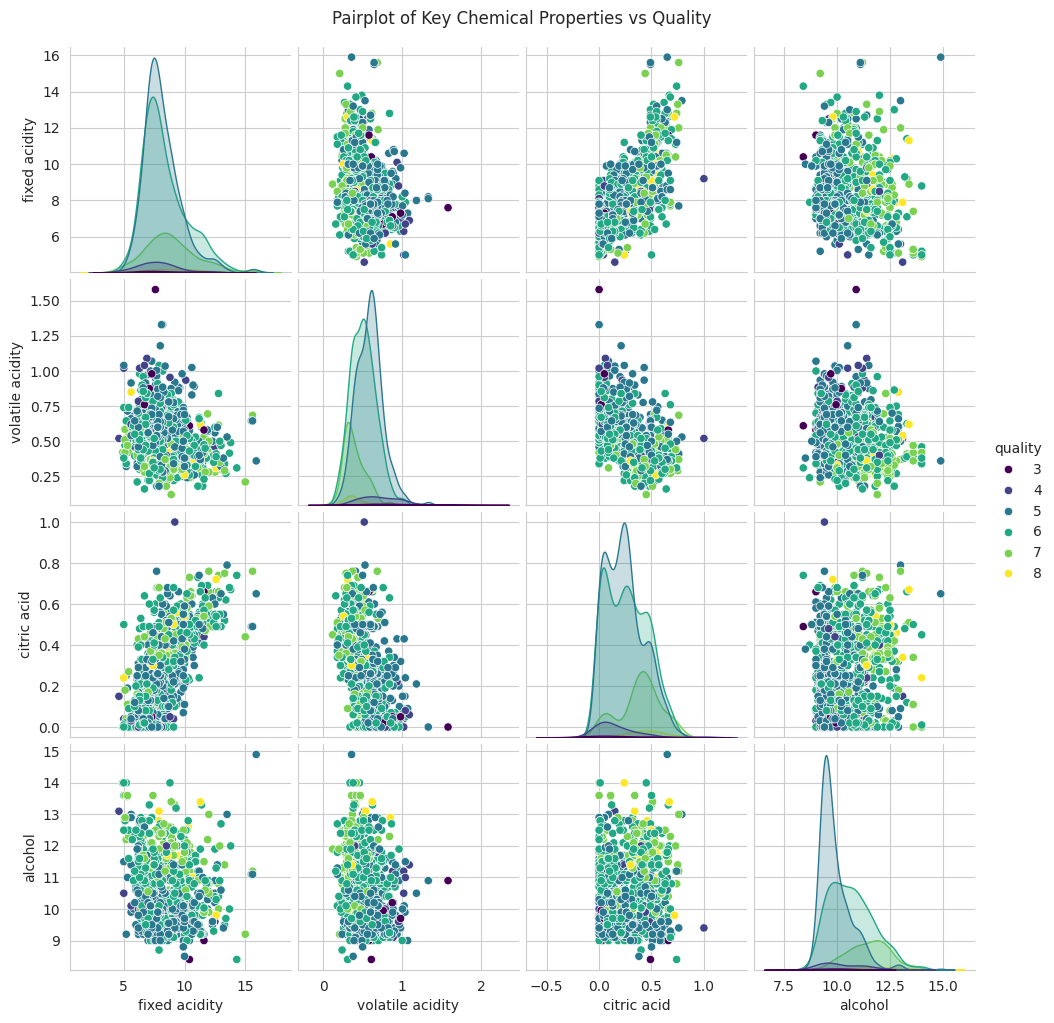

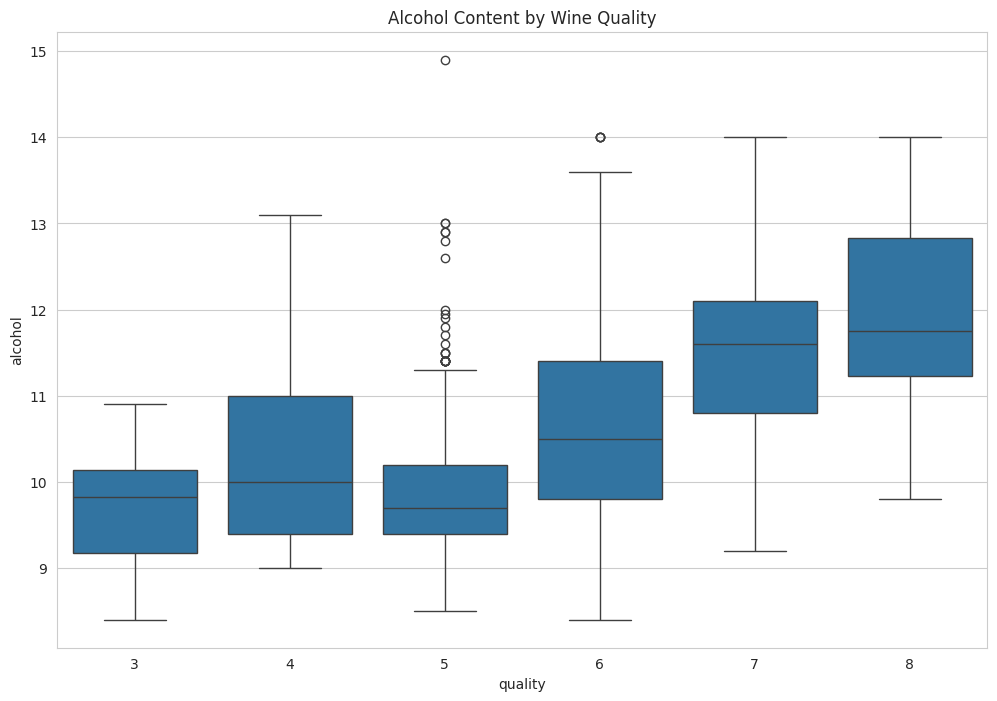

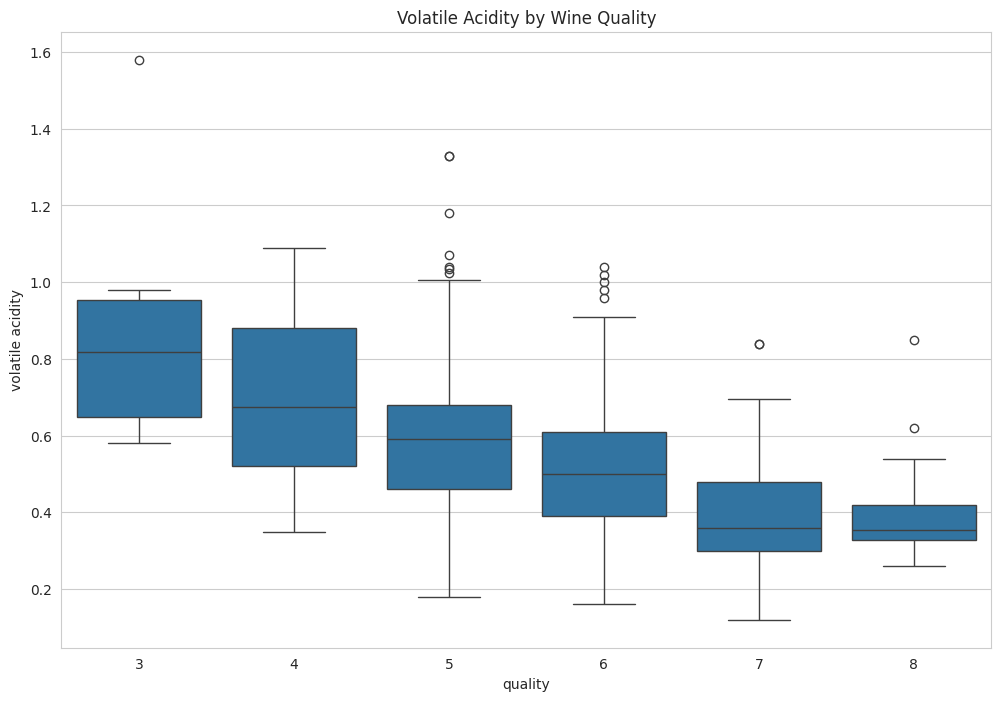

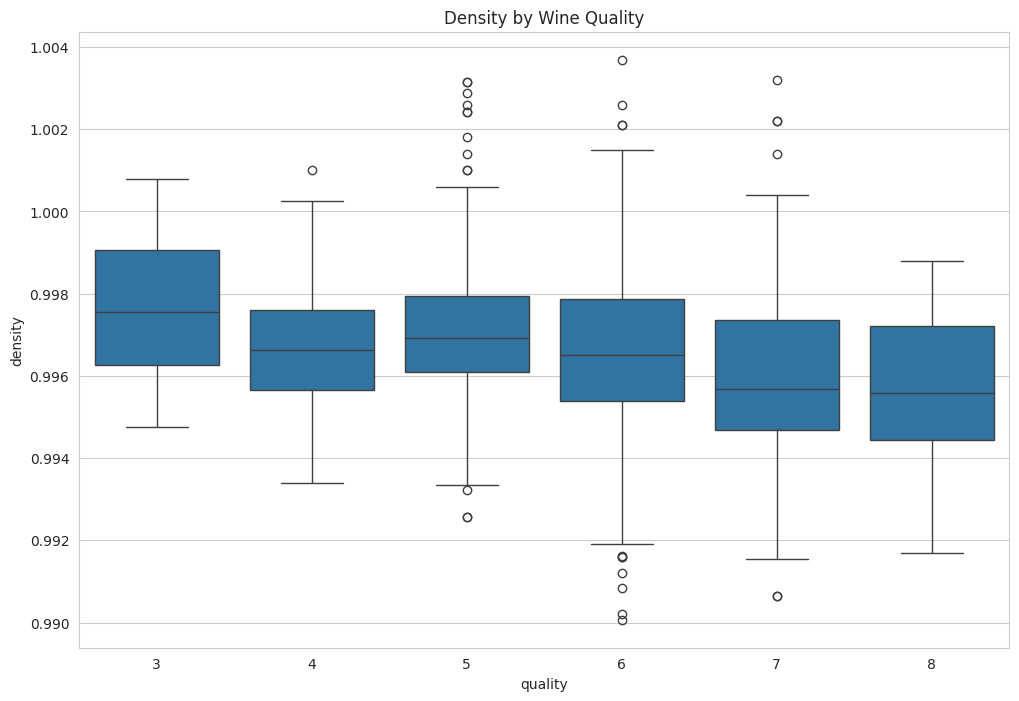

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for visualizations
sns.set_style('whitegrid')

# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = wine_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Pairplot of selected features
sns.pairplot(wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']],
             hue='quality', palette='viridis')
plt.suptitle('Pairplot of Key Chemical Properties vs Quality', y=1.02)
plt.show()

# Boxplots of key features against quality
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=wine_data)
plt.title('Alcohol Content by Wine Quality')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='volatile acidity', data=wine_data)
plt.title('Volatile Acidity by Wine Quality')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='density', data=wine_data)
plt.title('Density by Wine Quality')
plt.show()

Data Preprocessing :


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Create binary classification (good/bad wine)
wine_data['quality_class'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)



In [ ]:
# Separate features and target
X = wine_data.drop(['quality', 'quality_class', 'Id'], axis=1)
y = wine_data['quality_class']


In [ ]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       102
           1       0.79      0.76      0.78       127

    accuracy                           0.76       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.76      0.76       229

Accuracy: 0.7554585152838428

Confusion Matrix:
[[76 26]
 [30 97]]


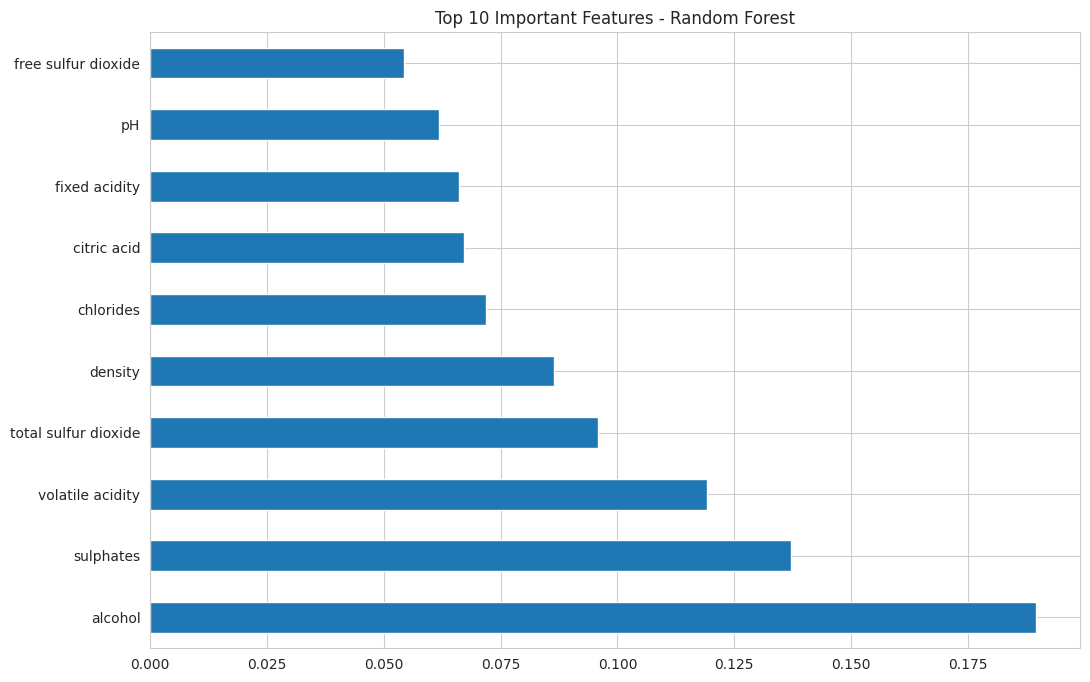

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Feature importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier



sgd = SGDClassifier(max_iter=1000, random_state=42)
sgd.fit(X_train_scaled, y_train)
sgd_pred = sgd.predict(X_test_scaled)

print("\nStochastic Gradient Descent Classifier:")
print(classification_report(y_test, sgd_pred))
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, sgd_pred))


Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       102
           1       0.75      0.74      0.74       127

    accuracy                           0.72       229
   macro avg       0.71      0.71      0.71       229
weighted avg       0.72      0.72      0.72       229

Accuracy: 0.7161572052401747

Confusion Matrix:
[[70 32]
 [33 94]]


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

print("\nSupport Vector Classifier:")
print(classification_report(y_test, svc_pred))
print("Accuracy:", accuracy_score(y_test, svc_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svc_pred))


Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       102
           1       0.78      0.80      0.79       127

    accuracy                           0.76       229
   macro avg       0.76      0.76      0.76       229
weighted avg       0.76      0.76      0.76       229

Accuracy: 0.7641921397379913

Confusion Matrix:
[[ 73  29]
 [ 25 102]]


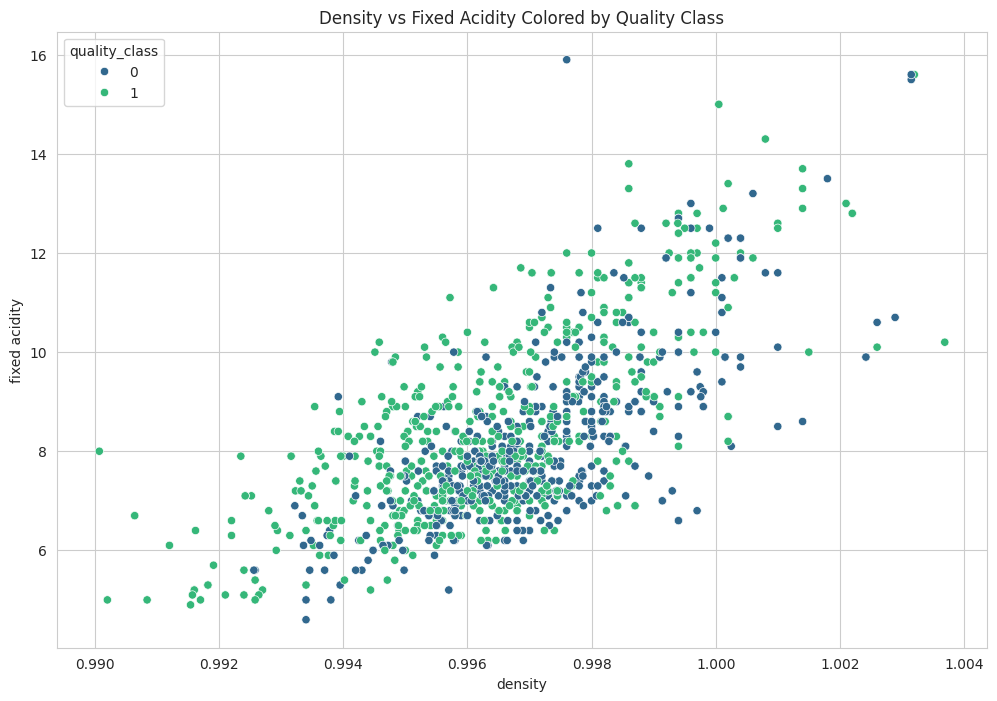

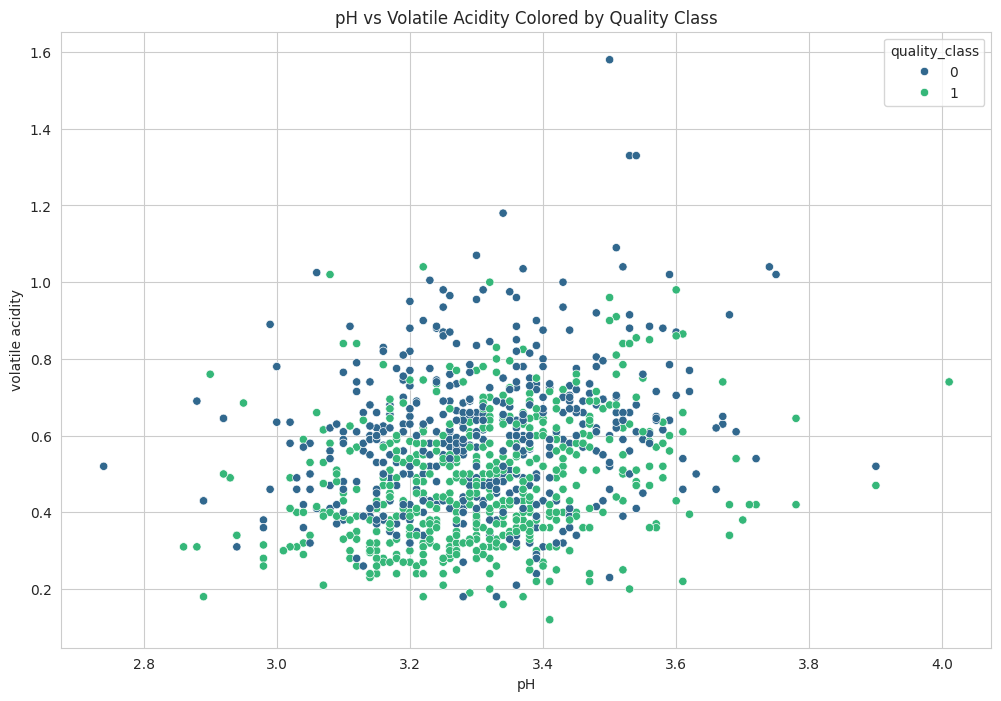


Mean values by quality class:
               fixed acidity  volatile acidity  citric acid   density  \
quality_class                                                           
0                   8.142146          0.596121     0.235096  0.997054   
1                   8.453140          0.476884     0.296329  0.996458   

                 alcohol  
quality_class             
0               9.922510  
1              10.878878  


In [ ]:
# Analyzing density and acidity as predictors
plt.figure(figsize=(12, 8))
sns.scatterplot(x='density', y='fixed acidity', hue='quality_class', data=wine_data, palette='viridis')
plt.title('Density vs Fixed Acidity Colored by Quality Class')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pH', y='volatile acidity', hue='quality_class', data=wine_data, palette='viridis')
plt.title('pH vs Volatile Acidity Colored by Quality Class')
plt.show()

# Statistical analysis of key chemical properties
print("\nMean values by quality class:")
print(wine_data.groupby('quality_class')[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'alcohol']].mean())